In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


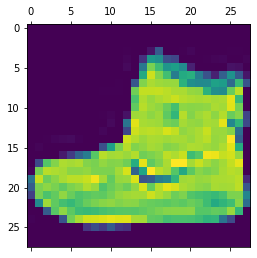

In [3]:
plt.matshow(x_train[0])

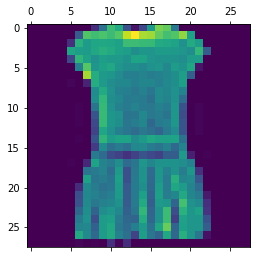

In [4]:
plt.matshow(x_train[3])

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [10]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [11]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5989 - accuracy: 0.7981
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4608 - accuracy: 0.8424
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4356 - accuracy: 0.8490
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4224 - accuracy: 0.8536
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4140 - accuracy: 0.8572


In [13]:
y_predict = model.predict(x_test_flattened)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([4.0447226e-04, 1.3451361e-04, 7.8493394e-03, 1.7042762e-03,
       6.2798844e-03, 9.7764182e-01, 2.4309609e-02, 9.7330260e-01,
       7.2773695e-01, 9.9673766e-01], dtype=float32)

In [14]:
y_test[5]

1

In [15]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:9]

[9, 2, 1, 1, 6, 1, 4, 6, 5]

In [16]:
cm  = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[867,   3,  13,  51,   7,   0,  48,   0,  11,   0],
       [  4, 956,   1,  31,   4,   0,   2,   0,   2,   0],
       [ 23,   6, 752,  12, 141,   1,  61,   0,   4,   0],
       [ 33,   8,  12, 896,  27,   0,  21,   0,   3,   0],
       [  2,   2, 117,  54, 763,   0,  57,   0,   5,   0],
       [  1,   0,   0,   1,   0, 899,   0,  54,   3,  42],
       [211,   3, 141,  46, 128,   0, 457,   0,  14,   0],
       [  0,   0,   0,   0,   0,  28,   0, 939,   0,  33],
       [  7,   1,   9,  11,   4,   4,  17,   5, 942,   0],
       [  0,   0,   0,   0,   0,   5,   1,  39,   0, 955]], dtype=int32)>

In [17]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.8426


[0.45590659976005554, 0.8425999879837036]

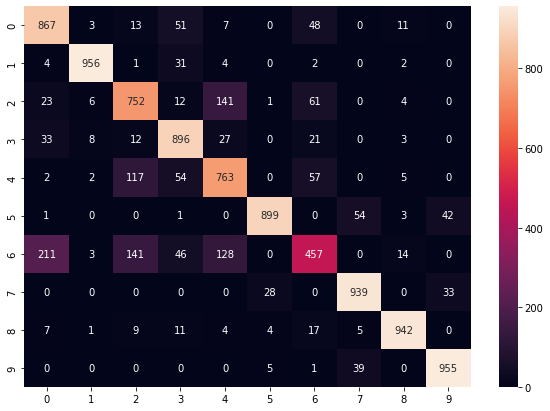

In [18]:
import seaborn as sns
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel = ("Predicted")
plt.ylabel = ('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4744 - accuracy: 0.8279
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3564 - accuracy: 0.8695
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3221 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2947 - accuracy: 0.8902
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2787 - accuracy: 0.8946


In [20]:
y_predict_labels = [np.argmax(i) for i in y_predict]
prediction = np.argmax(y_predict[0])

In [21]:
prediction

9

In [24]:
y_test[3]

1

#The values represent the classes:
0 = T-shirt/top
1 = Trouser
2 = Pullover
3 = Dress
4 = Coat
5 = Sandal
6 = Shirt
7 = Sneaker
8 = Bag
9 = Ankle boot

In [28]:
prediction = np.argmax(y_predict[9])
if prediction == 0:
  print('T-shirt/top')
elif prediction == 1:
  print('Trouser')
elif prediction == 2:
  print('Pullover')
elif prediction == 3:
  print('Dress')
elif prediction == 4:
  print('Coat')
elif prediction == 5:
  print('Sandal')
elif prediction == 6:
  print('Shirt')
elif prediction == 7:
  print('Sneaker')
elif prediction == 8:
  print('Bag')
elif prediction == 9:
  print('Ankle boot')

Sneaker
